# Intro to Machine Learning

In this notebook we will introduce the basic concepts of Machine Learning.
The topics include:
   - Build a Model - Linear Regression
   - Train and Test the Model
   - Evaluate the Model - RMSE

In [63]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Linear Regression Model

Linear Regression is a model that fits a straight line between a target variable and 1 or more response variables. It does so in a manner that minimizes the sum of squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0).

A deep dive into how to conduct a linear regression and interpret its outputs can be found [here](https://github.com/wynne-sifi/tutorials/blob/main/Linear%20Regression/Linear%20Regression%20Walkthrough.ipynb).

## Salary and Years of Experience

Let's consider a contrived dataset with Salary as our target variable and Years of Experience as our feature variable.

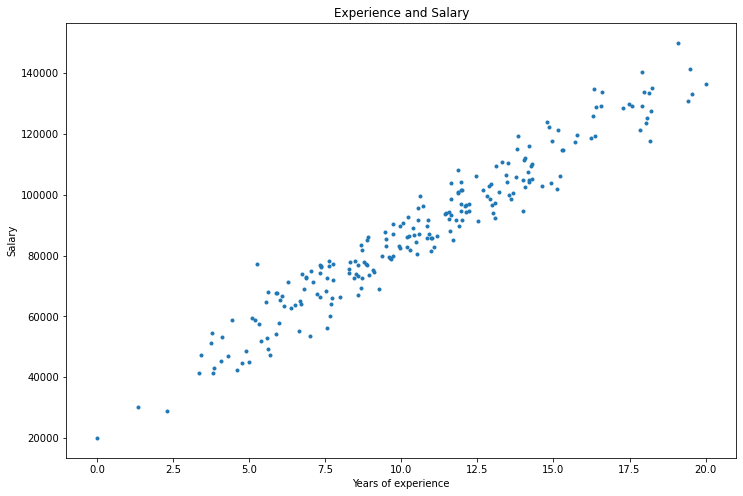

In [64]:
## Generate data

import matplotlib.pyplot as plt 
 

x, y, coef = datasets.make_regression(n_samples=220,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))

# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

X = pd.DataFrame(x,columns=['Age'])
Y = pd.DataFrame(y,columns=['Salary'])
df = pd.concat([X,Y],axis=1)

def plot_model():
    plt.figure(figsize=(12,8))
    plt.plot(x,y,'.',label='training data')
    plt.xlabel('Years of experience');plt.ylabel('Salary')
    plt.title('Experience and Salary')

plot_model()

## Fit the Model w/ Scikit Learn

In [67]:
from sklearn.linear_model import LinearRegression

# Create an instance of a linear regression model and fit it to the data with the fit() function:
lm = LinearRegression()
lm.fit(x.reshape(-1, 1), y) 

LinearRegression()

In [68]:
# Print the Intercept:
print('intercept:', lm.intercept_)

# Print the Slope:
print('slope:', lm.coef_)

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = lm.score(x, y)
print('coefficient of determination:', round(r_sq,3))

intercept: 25687.396729007407
slope: [5860.22956477]
coefficient of determination: 0.937


# Salary = 25,687.40 + 5,860.23*Experience

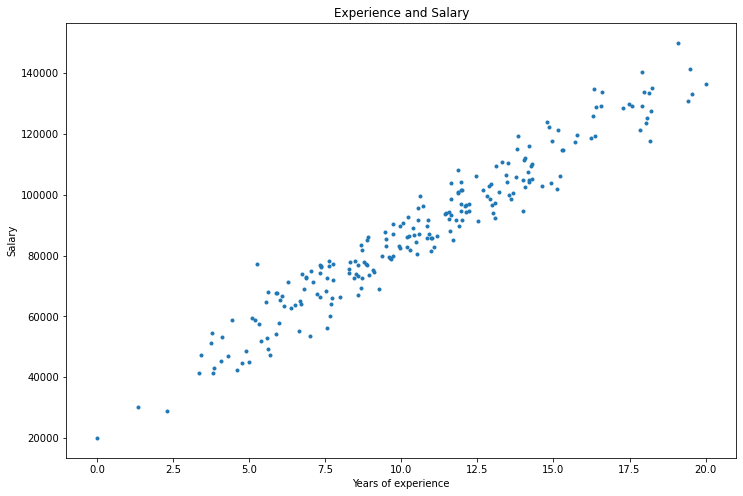

In [47]:
plot_model()

## Predict

In [69]:
lm.predict([[17]])

array([125311.29933005])

## Age and Running Speed

Consider now a contrived dataset with Running Speed (mph) as our target variable and Age as our feature variable.

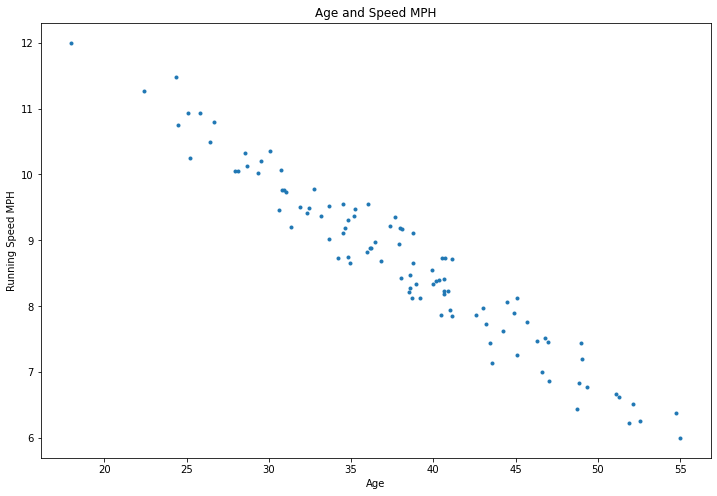

In [70]:
## Generate data

from sklearn import datasets
import matplotlib.pyplot as plt #for plotting

x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

x = np.interp(x, (x.min(), x.max()), (18, 55))

y = np.interp(y, (y.min(), y.max()), (12, 6))

def plot_model():
    plt.figure(figsize=(12,8))
    plt.plot(x,y,'.',label='training data')
    plt.xlabel('Age');plt.ylabel('Running Speed MPH')
    plt.title('Age and Speed MPH')
    
plot_model()

In [71]:
## Fit model

lm = LinearRegression()
lm.fit(x.reshape(-1, 1), y) 

LinearRegression()

In [72]:
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)
r_sq = lm.score(x, y)
print('coefficient of determination:', round(r_sq,3))

intercept: 14.73231812502703
slope: [-0.15886002]
coefficient of determination: 0.942


# Speed = 14.73 + (-.159)*Age

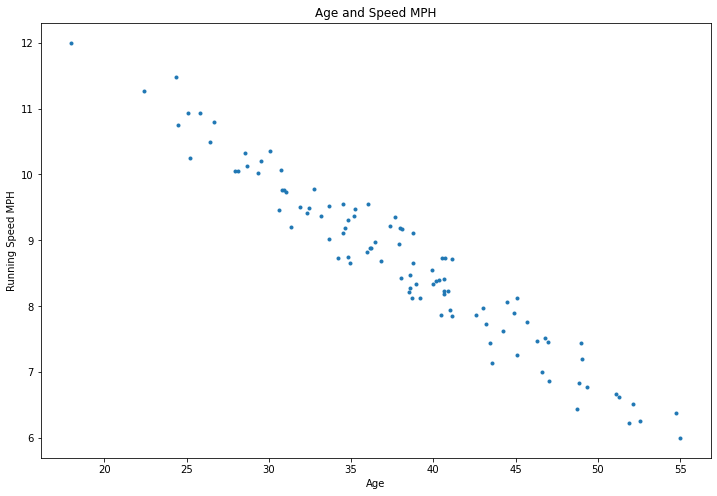

In [51]:
plot_model()

In [75]:
lm.predict([[0]])

array([14.73231813])

# The Learning

Given the first dataset, the machine learned that for Salary and Years of Exp: the equation of the line was
- **Salary = 25,687.40 + 5,860.23*Experience**

Given the second dataset, machine learned that for Speed and Age: the equation of the line was
- **Speed = 14.73 + (-.159)*Age**


# Training and Testing

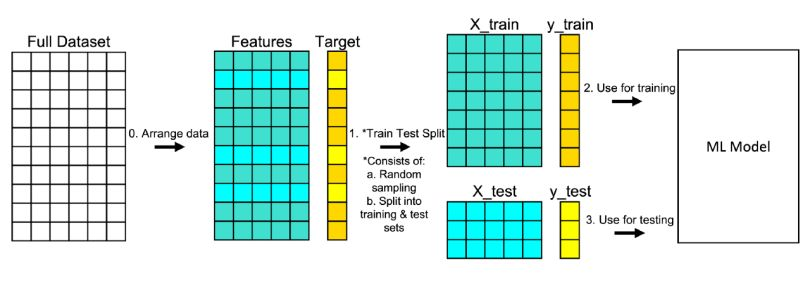

### Use our Salary Dataset

In [76]:
x, y, coef = datasets.make_regression(n_samples=220,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

x = np.interp(x, (x.min(), x.max()), (0, 20))
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

X = pd.DataFrame(x,columns=['Age'])
Y = pd.DataFrame(y,columns=['Salary'])
df = pd.concat([X,Y],axis=1)

In [77]:
df.head()

,Age,Salary
0,9.374180,79787.238556
1,10.555445,95780.123243
2,16.596000,133806.186476
3,6.995560,53539.865730
4,3.349614,41292.374536


In [55]:
df.shape

(220, 2)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [83]:
# Print the Intercept:
print('intercept:', lm.intercept_)

# Print the Slope:
print('slope:', lm.coef_)

intercept: 26334.649260906845
slope: [5782.91363035]


See how the values of these parameters change when you use different subsets of the data (resample by changing random_state).

## Metrics

In Machine Learning, we use various metrics to evaluate our model, to judge its performance so to speak. For linear regression we use what is called the Root Mean Square Error.

**RMSE** This is standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results. The lower the better.

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predicted = lm.predict(X_test)
residual = Y_test - predicted

rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print(rmse)
print(r2_score(Y_test, predicted))

6263.059945788165
0.9435528970093261


Not bad! 

## Residual Plot

Text(0.5, 1.0, 'Residual vs Predicted')

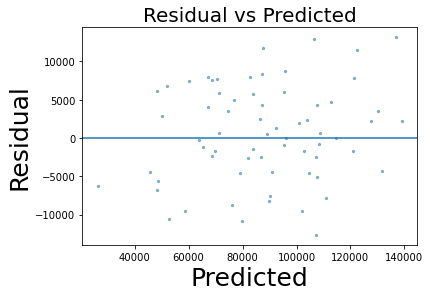

In [22]:
plt.scatter(predicted, residual,s=5,alpha=.5)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs Predicted',fontsize=20)